In [1]:
import pandas as pd
import json
import requests
#from api_keys import crime_api_key
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
va_data = pd.read_csv("nibrs_incident_2012_VA.csv")
va_data.head()

C:\Users\Oleg\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,agency_id,incident_id,nibrs_month_id,incident_number,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,cleared_except_date,incident_status,data_home,ddocname,orig_format,ff_line_number,did
0,20092,64658167,5803582,2011-003951,NaN,NaN,2012-01-26 00:00:00,NaN,13.0,6,NaN,0,C,2012_01_VA0160200_2011-003951_INC_NIBRS,NaN,NaN,NaN
1,20092,64658168,5803582,2012-002846,NaN,NaN,2012-01-19 00:00:00,NaN,13.0,6,NaN,0,C,2012_01_VA0160200_2012-002846_INC_NIBRS,NaN,NaN,NaN
2,20092,64658166,5825783,2010-007106,NaN,NaN,2012-02-13 00:00:00,NaN,13.0,6,NaN,0,C,2012_02_VA0160200_2010-007106_INC_NIBRS,NaN,NaN,NaN
3,20092,64658169,5825783,2012-003951,NaN,NaN,2012-02-01 00:00:00,NaN,7.0,6,NaN,0,C,2012_02_VA0160200_2012-003951_INC_NIBRS,NaN,NaN,NaN
4,20092,64658170,5825783,2012-007106,NaN,NaN,2012-02-21 00:00:00,NaN,7.0,6,NaN,0,C,2012_02_VA0160200_2012-007106_INC_NIBRS,NaN,NaN,NaN


In [3]:
va_data_formated = va_data[["incident_date", "ddocname"]]
va_data_formated.head()

,incident_date,ddocname
0,2012-01-26 00:00:00,2012_01_VA0160200_2011-003951_INC_NIBRS
1,2012-01-19 00:00:00,2012_01_VA0160200_2012-002846_INC_NIBRS
2,2012-02-13 00:00:00,2012_02_VA0160200_2010-007106_INC_NIBRS
3,2012-02-01 00:00:00,2012_02_VA0160200_2012-003951_INC_NIBRS
4,2012-02-21 00:00:00,2012_02_VA0160200_2012-007106_INC_NIBRS


In [4]:
va_data_formated["incident_date"] = va_data_formated["incident_date"].str[:7]
va_data_formated["ddocname"] = va_data_formated["ddocname"].str[8:17]
va_data_formated.head()

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,incident_date,ddocname
0,2012-01,VA0160200
1,2012-01,VA0160200
2,2012-02,VA0160200
3,2012-02,VA0160200
4,2012-02,VA0160200


In [5]:
va_data_formated.count()

incident_date    422665
ddocname         422665
dtype: int64

In [6]:
info_plot = va_data_formated.groupby("incident_date").count()
info_plot.head()

,ddocname
incident_date,
2012-01,34061
2012-02,31153
2012-03,35417
2012-04,34602
2012-05,37677


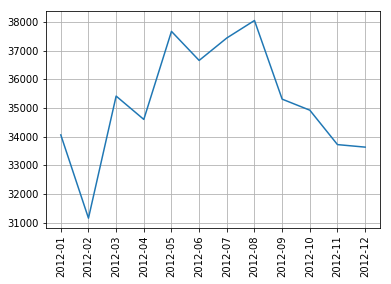

In [7]:
plt.plot(info_plot.index, info_plot.ddocname)
plt.xticks(rotation=90)
plt.grid()

In [8]:
va_data_filtered = va_data_formated.loc[(va_data_formated["ddocname"] == "VA0540000") | 
                                        (va_data_formated["ddocname"] == "VA054SP00") |
                                        (va_data_formated["ddocname"] == "VA0540100"), :]
va_data_filtered.ddocname.count()

1124

In [9]:
va_data_filtered.head()

,incident_date,ddocname
14704,2012-01,VA0540000
14705,2012-01,VA0540000
14706,2012-02,VA0540000
14707,2012-02,VA0540000
14708,2012-02,VA0540000


In [10]:
info_plot_filtered = va_data_filtered.groupby("incident_date").count()
info_plot_filtered.head()

,ddocname
incident_date,
2012-01,19
2012-02,79
2012-03,50
2012-04,108
2012-05,120


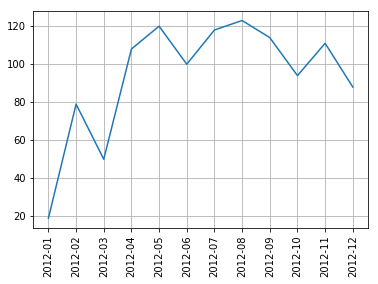

In [11]:
plt.plot(info_plot_filtered.index, info_plot_filtered.ddocname)
plt.xticks(rotation=90)
plt.grid()